In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "8"

import os.path as osp
import sys
import warnings

import anutils as anu
import anutils.scutils as scu
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from tqdm.auto import tqdm

sc.settings.verbosity = 3
sc.set_figure_params(figsize=(4, 4), dpi=80, facecolor="white")

warnings.filterwarnings("ignore")

In [3]:
sys.path.append("../")

from scalex_nb.function import SCALEX, SCALEX_NB

In [4]:
import datetime

adata_path = "/home/ningweixi/projects/toys/SpatialOmics/experiments/notebooks/scib/data/Immune_ALL_human/adata_batch_scaled.h5ad"

outdir = "./noNB_test_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [5]:
scalex_args = dict(
    data_list=[adata_path],
    batch_categories=None,
    profile="RNA",
    batch_name="batch",
    min_features=1,
    min_cells=1,
    target_sum=None,
    n_top_features=None,
    join="inner",
    batch_key="__batch",
    processed=True,
    fraction=None,
    n_obs=None,
    batch_size=64,
    lr=2e-4,
    max_iteration=30000,
    seed=124,
    gpu=0,
    outdir=outdir,
    projection=None,
    repeat=False,
    impute=None,
    chunk_size=20000,
    ignore_umap=True,
    verbose=False,
    assess=False,
    show=False,
    eval=True,
    num_workers=4,
)

In [6]:
adata_scalex = SCALEX(**scalex_args)

2023-07-21 21:17:42,273 - SCALEX - INFO - Raw dataset shape: (32484, 2000)
2023-07-21 21:17:42,276 - SCALEX - INFO - There are 9 batches under batch_name: batch


Epochs:   0%|          | 0/60 [00:00<?, ?it/s]

eval mode


In [7]:
adata_scalex.write_h5ad(osp.join(outdir, "adata_scalex.h5ad"))

In [8]:
adata = adata_scalex.copy()

In [9]:
sc.pp.neighbors(adata, use_rep="latent")
sc.tl.umap(adata, min_dist=0.5)
sc.tl.leiden(adata, key_added="leiden", resolution=0.5)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:39)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:33)
running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


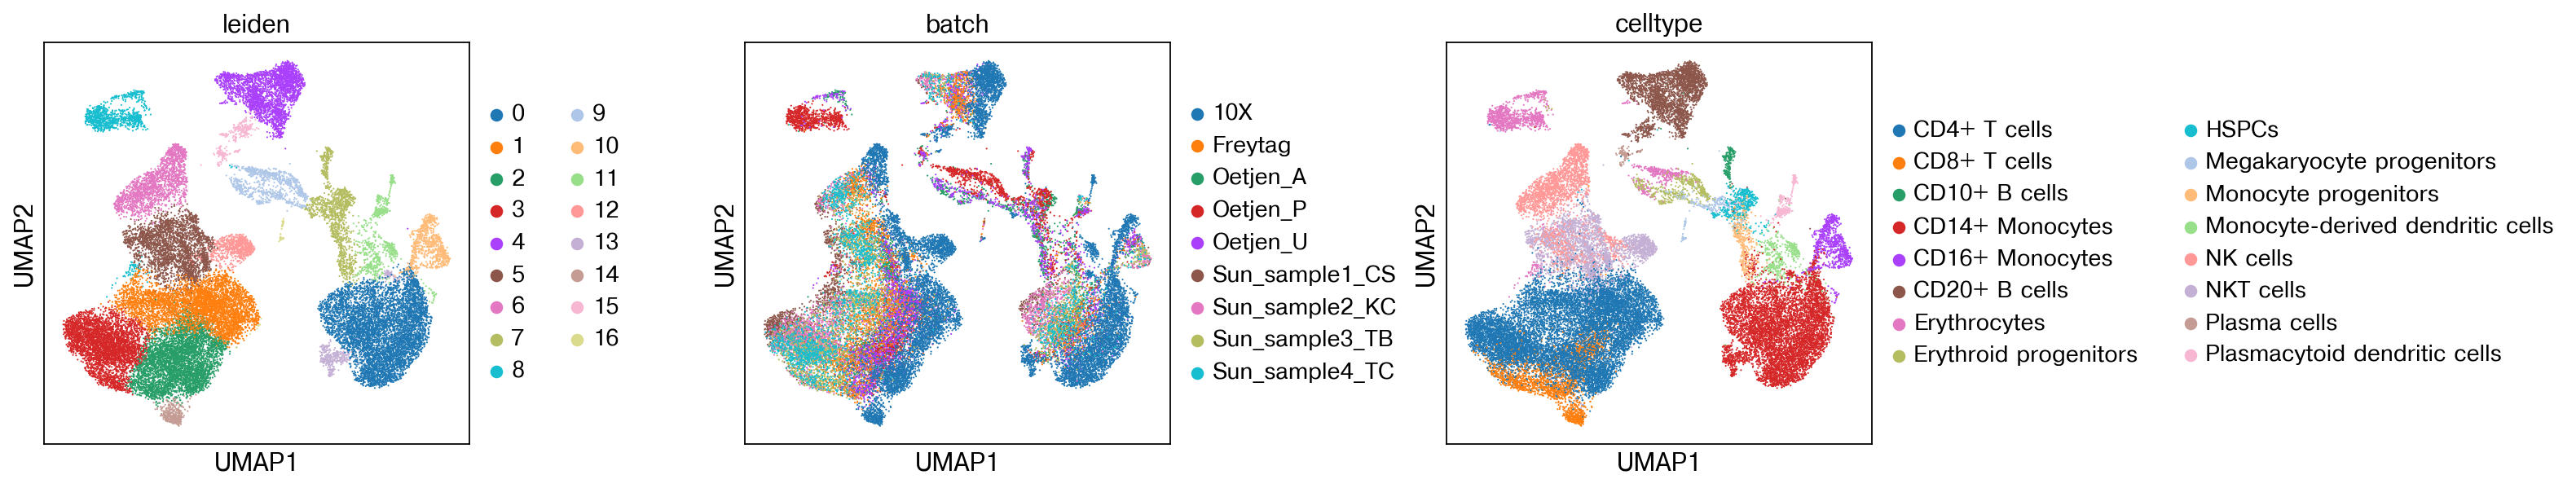

In [10]:
sc.pl.umap(adata, color=["leiden", "batch", "celltype"], wspace=0.5)

In [11]:
import scib

metrics = {
    "nmi": scib.metrics.nmi(adata, "leiden", "celltype"),
    "ari": scib.metrics.ari(adata, "leiden", "celltype"),
}

print(metrics)

{'nmi': 0.7440228411429515, 'ari': 0.5481765649680482}
